In [1]:
# Importing the libraries
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets


In [2]:

data= datasets.load_iris()
data = pd.DataFrame(data.data, columns = data.feature_names)
data.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


No missing values

In [4]:
# Initialize an empty list to store the WCSS values for different k
wcss = []

# Try k values from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)



 The elbow method is a technique used in clustering analysis to determine the optimal number of clusters. It involves plotting the within-cluster sum of squares (WCSS) for different cluster numbers and identifying the “elbow” point where WCSS starts to level off.

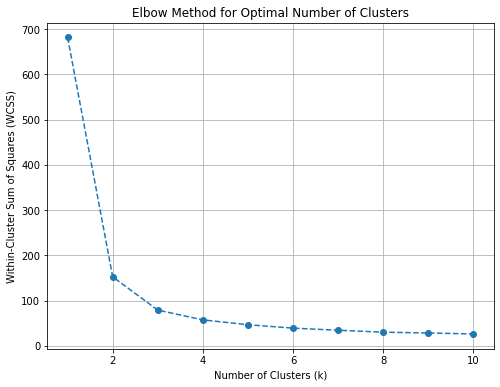

In [5]:
# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


From the graph we can clearly tell that optimal number of clusters are 3

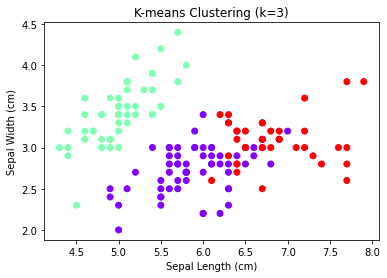

In [6]:
k = 3  # Change this to the determined optimal value

# Create a K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the K-means model to the data
kmeans.fit(data)

# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Visualize the clusters (for 2D data, you can choose any two features for plotting)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'K-means Clustering (k={k})')

plt.show()


